In [129]:
#from keras import applications
#from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
#from keras.layers import LeakyReLUb
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
#from tensorflow.keras import model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [130]:
import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
import sklearn.metrics as sm
import xgboost

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.decomposition import PCA

import pickle

In [131]:
df = pd.read_csv('Train_new4.csv')

In [132]:
df = df.replace(np.nan, 0)
#df.info()
df.shape

(3735, 27)

In [133]:
df = df.dropna()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3735 entries, 0 to 3734
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SK1       3735 non-null   float64
 1   SK2       3735 non-null   float64
 2   SB1       3735 non-null   float64
 3   SB2       3735 non-null   float64
 4   SG1       3735 non-null   float64
 5   SY1       3735 non-null   float64
 6   SY2       3735 non-null   float64
 7   SY3       3735 non-null   float64
 8   SO1       3735 non-null   float64
 9   SP1       3735 non-null   float64
 10  SV1       3735 non-null   float64
 11  SR1       3735 non-null   float64
 12  SR2       3735 non-null   float64
 13  SR3       3735 non-null   float64
 14  SW1       3735 non-null   float64
 15  Target_L  3735 non-null   float64
 16  Target_a  3735 non-null   float64
 17  Target_b  3735 non-null   float64
 18  Base      3735 non-null   object 
 19  Pro_name  3735 non-null   object 
 20  Base_A    3735 non-null   floa

In [135]:
nunique = df.nunique()

nunique = pd.DataFrame(nunique)
pd.set_option('display.max_rows', nunique.shape[0]+1)
nunique

,0
SK1,64
SK2,414
SB1,15
SB2,415
SG1,419
SY1,413
SY2,506
SY3,384
SO1,291
SP1,240


In [136]:
# x,y 인자 선정

#X = df.drop(['Final_Dl','Final_Da','Final_Db'], axis=1)
X = df.drop(['Base','Pro_name','Target_L','Target_a','Target_b'], axis=1)

y = df[['Target_L','Target_a','Target_b']]


X2 = pd.concat((X, y),axis=1)
X2.to_csv('train.csv',index = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=7)
#X_test3 = X_test2.copy()
#X_test3


In [137]:
X_train

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,SR2,SR3,SW1,Base_A,Base_B,Base_C,UT6581,UT578_A,UT578_AF,UT578_AS
1364,0.0,0.0,0.0,0.0,0.0,0.0,250.0,130.0,30.0,0.0,...,0.0,0.0,800.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
275,0.0,125.0,0.0,402.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3198,0.0,271.0,0.0,0.0,0.0,240.0,0.0,0.0,0.0,0.0,...,0.0,137.0,321.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2190,0.0,0.0,0.0,0.0,0.0,403.0,23.0,0.0,0.0,0.0,...,0.0,10.0,609.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1621,4.0,0.0,0.0,0.0,0.0,0.0,607.0,530.0,31.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540.0,0.0,...,636.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2550,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140.0,81.0,606.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
537,0.0,0.0,0.0,0.0,75.0,0.0,1264.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1220,0.0,0.0,0.0,169.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Epoch 1/5000
75/75 [==============================] - 1s 8ms/step - loss: 1273.6090 - mean_squared_error: 1273.6090 - val_loss: 503.9658 - val_mean_squared_error: 503.9658
Epoch 2/5000
75/75 [==============================] - 0s 3ms/step - loss: 335.5588 - mean_squared_error: 335.5588 - val_loss: 327.0312 - val_mean_squared_error: 327.0312
Epoch 3/5000
75/75 [==============================] - 0s 3ms/step - loss: 304.5228 - mean_squared_error: 304.5228 - val_loss: 321.3615 - val_mean_squared_error: 321.3615
Epoch 4/5000
75/75 [==============================] - 0s 3ms/step - loss: 298.4723 - mean_squared_error: 298.4723 - val_loss: 312.7473 - val_mean_squared_error: 312.7473
Epoch 5/5000
75/75 [==============================] - 0s 3ms/step - loss: 284.6121 - mean_squared_error: 284.6121 - val_loss: 289.0822 - val_mean_squared_error: 289.0822
Epoch 6/5000
75/75 [==============================] - 0s 3ms/step - loss: 229.5062 - mean_squared_error: 229.5062 - val_loss: 185.3537 - val_mean_sq

Epoch 50/5000
75/75 [==============================] - 0s 2ms/step - loss: 8.8838 - mean_squared_error: 8.8838 - val_loss: 10.5858 - val_mean_squared_error: 10.5858
Epoch 51/5000
75/75 [==============================] - 0s 2ms/step - loss: 8.4743 - mean_squared_error: 8.4743 - val_loss: 9.6311 - val_mean_squared_error: 9.6311
Epoch 52/5000
75/75 [==============================] - 0s 2ms/step - loss: 8.2450 - mean_squared_error: 8.2450 - val_loss: 9.8167 - val_mean_squared_error: 9.8167
Epoch 53/5000
75/75 [==============================] - 0s 2ms/step - loss: 8.1935 - mean_squared_error: 8.1935 - val_loss: 9.7776 - val_mean_squared_error: 9.7776
Epoch 54/5000
75/75 [==============================] - 0s 3ms/step - loss: 7.9091 - mean_squared_error: 7.9091 - val_loss: 9.3102 - val_mean_squared_error: 9.3102
Epoch 55/5000
75/75 [==============================] - 0s 2ms/step - loss: 8.0992 - mean_squared_error: 8.0992 - val_loss: 9.3493 - val_mean_squared_error: 9.3493
Epoch 56/5000
75/75 

75/75 [==============================] - 0s 3ms/step - loss: 4.4914 - mean_squared_error: 4.4914 - val_loss: 5.4812 - val_mean_squared_error: 5.4812
Epoch 101/5000
75/75 [==============================] - 0s 2ms/step - loss: 4.2406 - mean_squared_error: 4.2406 - val_loss: 5.3771 - val_mean_squared_error: 5.3771
Epoch 102/5000
75/75 [==============================] - 0s 2ms/step - loss: 4.1384 - mean_squared_error: 4.1384 - val_loss: 5.8828 - val_mean_squared_error: 5.8828
Epoch 103/5000
75/75 [==============================] - 0s 2ms/step - loss: 4.3109 - mean_squared_error: 4.3109 - val_loss: 4.8740 - val_mean_squared_error: 4.8740
Epoch 104/5000
75/75 [==============================] - 0s 2ms/step - loss: 4.2839 - mean_squared_error: 4.2839 - val_loss: 5.5304 - val_mean_squared_error: 5.5304
Epoch 105/5000
75/75 [==============================] - 0s 2ms/step - loss: 4.2835 - mean_squared_error: 4.2835 - val_loss: 4.9848 - val_mean_squared_error: 4.9848
Epoch 106/5000
75/75 [=========

75/75 [==============================] - 0s 5ms/step - loss: 3.1670 - mean_squared_error: 3.1670 - val_loss: 4.1430 - val_mean_squared_error: 4.1430
Epoch 151/5000
75/75 [==============================] - 0s 4ms/step - loss: 3.3759 - mean_squared_error: 3.3759 - val_loss: 4.1020 - val_mean_squared_error: 4.1020
Epoch 152/5000
75/75 [==============================] - 0s 2ms/step - loss: 3.0403 - mean_squared_error: 3.0403 - val_loss: 4.4347 - val_mean_squared_error: 4.4347
Epoch 153/5000
75/75 [==============================] - 0s 2ms/step - loss: 3.2320 - mean_squared_error: 3.2320 - val_loss: 4.5173 - val_mean_squared_error: 4.5173
Epoch 154/5000
75/75 [==============================] - 0s 2ms/step - loss: 3.0304 - mean_squared_error: 3.0304 - val_loss: 3.9239 - val_mean_squared_error: 3.9239
Epoch 155/5000
75/75 [==============================] - 0s 3ms/step - loss: 3.0767 - mean_squared_error: 3.0767 - val_loss: 4.1089 - val_mean_squared_error: 4.1089
Epoch 156/5000
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 2.5606 - mean_squared_error: 2.5606 - val_loss: 3.5172 - val_mean_squared_error: 3.5172
Epoch 201/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.6178 - mean_squared_error: 2.6178 - val_loss: 4.2370 - val_mean_squared_error: 4.2370
Epoch 202/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.6401 - mean_squared_error: 2.6401 - val_loss: 3.6329 - val_mean_squared_error: 3.6329
Epoch 203/5000
75/75 [==============================] - 0s 3ms/step - loss: 2.5668 - mean_squared_error: 2.5668 - val_loss: 3.7084 - val_mean_squared_error: 3.7084
Epoch 204/5000
75/75 [==============================] - 0s 4ms/step - loss: 2.7018 - mean_squared_error: 2.7018 - val_loss: 4.0481 - val_mean_squared_error: 4.0481
Epoch 205/5000
75/75 [==============================] - 0s 3ms/step - loss: 2.7767 - mean_squared_error: 2.7767 - val_loss: 3.7324 - val_mean_squared_error: 3.7324
Epoch 206/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 2.3574 - mean_squared_error: 2.3574 - val_loss: 3.1609 - val_mean_squared_error: 3.1609
Epoch 251/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.3228 - mean_squared_error: 2.3228 - val_loss: 4.4068 - val_mean_squared_error: 4.4068
Epoch 252/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.4758 - mean_squared_error: 2.4758 - val_loss: 3.5677 - val_mean_squared_error: 3.5677
Epoch 253/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.5020 - mean_squared_error: 2.5020 - val_loss: 3.7272 - val_mean_squared_error: 3.7272
Epoch 254/5000
75/75 [==============================] - 0s 3ms/step - loss: 2.2434 - mean_squared_error: 2.2434 - val_loss: 3.3760 - val_mean_squared_error: 3.3760
Epoch 255/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.2729 - mean_squared_error: 2.2729 - val_loss: 3.3253 - val_mean_squared_error: 3.3253
Epoch 256/5000
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 2.2227 - mean_squared_error: 2.2227 - val_loss: 3.4591 - val_mean_squared_error: 3.4591
Epoch 301/5000
75/75 [==============================] - 0s 3ms/step - loss: 2.2069 - mean_squared_error: 2.2069 - val_loss: 3.5678 - val_mean_squared_error: 3.5678
Epoch 302/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.3286 - mean_squared_error: 2.3286 - val_loss: 3.6581 - val_mean_squared_error: 3.6581
Epoch 303/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.1696 - mean_squared_error: 2.1696 - val_loss: 3.7335 - val_mean_squared_error: 3.7335
Epoch 304/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.4325 - mean_squared_error: 2.4325 - val_loss: 4.5223 - val_mean_squared_error: 4.5223
Epoch 305/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.3405 - mean_squared_error: 2.3405 - val_loss: 3.5196 - val_mean_squared_error: 3.5196
Epoch 306/5000
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 2.1487 - mean_squared_error: 2.1487 - val_loss: 3.5639 - val_mean_squared_error: 3.5639
Epoch 351/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.9929 - mean_squared_error: 1.9929 - val_loss: 3.8080 - val_mean_squared_error: 3.8080
Epoch 352/5000
75/75 [==============================] - 0s 3ms/step - loss: 2.3023 - mean_squared_error: 2.3023 - val_loss: 3.2063 - val_mean_squared_error: 3.2063
Epoch 353/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.9430 - mean_squared_error: 1.9430 - val_loss: 3.7497 - val_mean_squared_error: 3.7497
Epoch 354/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.0715 - mean_squared_error: 2.0715 - val_loss: 3.4538 - val_mean_squared_error: 3.4538
Epoch 355/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.9929 - mean_squared_error: 1.9929 - val_loss: 3.2679 - val_mean_squared_error: 3.2679
Epoch 356/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 2.0149 - mean_squared_error: 2.0149 - val_loss: 3.4718 - val_mean_squared_error: 3.4718
Epoch 401/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.1226 - mean_squared_error: 2.1226 - val_loss: 3.2677 - val_mean_squared_error: 3.2677
Epoch 402/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.8826 - mean_squared_error: 1.8826 - val_loss: 3.0781 - val_mean_squared_error: 3.0781
Epoch 403/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.9122 - mean_squared_error: 1.9122 - val_loss: 3.2794 - val_mean_squared_error: 3.2794
Epoch 404/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.0632 - mean_squared_error: 2.0632 - val_loss: 3.2643 - val_mean_squared_error: 3.2643
Epoch 405/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.9579 - mean_squared_error: 1.9579 - val_loss: 3.1053 - val_mean_squared_error: 3.1053
Epoch 406/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.9880 - mean_squared_error: 1.9880 - val_loss: 3.6632 - val_mean_squared_error: 3.6632
Epoch 451/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.8969 - mean_squared_error: 1.8969 - val_loss: 3.4359 - val_mean_squared_error: 3.4359
Epoch 452/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.9391 - mean_squared_error: 1.9391 - val_loss: 3.0949 - val_mean_squared_error: 3.0949
Epoch 453/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.8792 - mean_squared_error: 1.8792 - val_loss: 3.5886 - val_mean_squared_error: 3.5886
Epoch 454/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.8381 - mean_squared_error: 1.8381 - val_loss: 3.4453 - val_mean_squared_error: 3.4453
Epoch 455/5000
75/75 [==============================] - 0s 2ms/step - loss: 2.1380 - mean_squared_error: 2.1380 - val_loss: 3.1375 - val_mean_squared_error: 3.1375
Epoch 456/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.7612 - mean_squared_error: 1.7612 - val_loss: 3.2976 - val_mean_squared_error: 3.2976
Epoch 501/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.6978 - mean_squared_error: 1.6978 - val_loss: 3.9943 - val_mean_squared_error: 3.9943
Epoch 502/5000
75/75 [==============================] - 0s 3ms/step - loss: 2.1309 - mean_squared_error: 2.1309 - val_loss: 3.2671 - val_mean_squared_error: 3.2671
Epoch 503/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.7662 - mean_squared_error: 1.7662 - val_loss: 2.9805 - val_mean_squared_error: 2.9805
Epoch 504/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.8119 - mean_squared_error: 1.8119 - val_loss: 3.4126 - val_mean_squared_error: 3.4126
Epoch 505/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.7741 - mean_squared_error: 1.7741 - val_loss: 3.5205 - val_mean_squared_error: 3.5205
Epoch 506/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.8164 - mean_squared_error: 1.8164 - val_loss: 3.2107 - val_mean_squared_error: 3.2107
Epoch 551/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.6832 - mean_squared_error: 1.6832 - val_loss: 3.0967 - val_mean_squared_error: 3.0967
Epoch 552/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.7712 - mean_squared_error: 1.7712 - val_loss: 3.2700 - val_mean_squared_error: 3.2700
Epoch 553/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6929 - mean_squared_error: 1.6929 - val_loss: 3.7817 - val_mean_squared_error: 3.7817
Epoch 554/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.7856 - mean_squared_error: 1.7856 - val_loss: 4.4191 - val_mean_squared_error: 4.4191
Epoch 555/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.9876 - mean_squared_error: 1.9876 - val_loss: 3.6242 - val_mean_squared_error: 3.6242
Epoch 556/5000
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 1.7022 - mean_squared_error: 1.7022 - val_loss: 3.1472 - val_mean_squared_error: 3.1472
Epoch 601/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.7697 - mean_squared_error: 1.7697 - val_loss: 4.1395 - val_mean_squared_error: 4.1395
Epoch 602/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.7311 - mean_squared_error: 1.7311 - val_loss: 3.4069 - val_mean_squared_error: 3.4069
Epoch 603/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.6618 - mean_squared_error: 1.6618 - val_loss: 3.2361 - val_mean_squared_error: 3.2361
Epoch 604/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.6065 - mean_squared_error: 1.6065 - val_loss: 3.3676 - val_mean_squared_error: 3.3676
Epoch 605/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6843 - mean_squared_error: 1.6843 - val_loss: 3.6263 - val_mean_squared_error: 3.6263
Epoch 606/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.5586 - mean_squared_error: 1.5586 - val_loss: 3.1731 - val_mean_squared_error: 3.1731
Epoch 651/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6890 - mean_squared_error: 1.6890 - val_loss: 3.4340 - val_mean_squared_error: 3.4340
Epoch 652/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5961 - mean_squared_error: 1.5961 - val_loss: 3.0655 - val_mean_squared_error: 3.0655
Epoch 653/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6735 - mean_squared_error: 1.6735 - val_loss: 3.5791 - val_mean_squared_error: 3.5791
Epoch 654/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.8357 - mean_squared_error: 1.8357 - val_loss: 3.3736 - val_mean_squared_error: 3.3736
Epoch 655/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.6595 - mean_squared_error: 1.6595 - val_loss: 3.7590 - val_mean_squared_error: 3.7590
Epoch 656/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.7560 - mean_squared_error: 1.7560 - val_loss: 3.1968 - val_mean_squared_error: 3.1968
Epoch 701/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6540 - mean_squared_error: 1.6540 - val_loss: 3.4038 - val_mean_squared_error: 3.4038
Epoch 702/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.7321 - mean_squared_error: 1.7321 - val_loss: 3.1411 - val_mean_squared_error: 3.1411
Epoch 703/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5538 - mean_squared_error: 1.5538 - val_loss: 3.4081 - val_mean_squared_error: 3.4081
Epoch 704/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.6603 - mean_squared_error: 1.6603 - val_loss: 3.0708 - val_mean_squared_error: 3.0708
Epoch 705/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.6348 - mean_squared_error: 1.6348 - val_loss: 3.3152 - val_mean_squared_error: 3.3152
Epoch 706/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.6804 - mean_squared_error: 1.6804 - val_loss: 3.6126 - val_mean_squared_error: 3.6126
Epoch 751/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6798 - mean_squared_error: 1.6798 - val_loss: 3.2754 - val_mean_squared_error: 3.2754
Epoch 752/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.6019 - mean_squared_error: 1.6019 - val_loss: 3.8976 - val_mean_squared_error: 3.8976
Epoch 753/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5479 - mean_squared_error: 1.5479 - val_loss: 3.1318 - val_mean_squared_error: 3.1318
Epoch 754/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.5688 - mean_squared_error: 1.5688 - val_loss: 3.1886 - val_mean_squared_error: 3.1886
Epoch 755/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.5805 - mean_squared_error: 1.5805 - val_loss: 3.3561 - val_mean_squared_error: 3.3561
Epoch 756/5000
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 1.7657 - mean_squared_error: 1.7657 - val_loss: 3.4222 - val_mean_squared_error: 3.4222
Epoch 801/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4643 - mean_squared_error: 1.4643 - val_loss: 3.0980 - val_mean_squared_error: 3.0980
Epoch 802/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5092 - mean_squared_error: 1.5092 - val_loss: 3.5529 - val_mean_squared_error: 3.5529
Epoch 803/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.9571 - mean_squared_error: 1.9571 - val_loss: 3.4589 - val_mean_squared_error: 3.4589
Epoch 804/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6464 - mean_squared_error: 1.6464 - val_loss: 3.2265 - val_mean_squared_error: 3.2265
Epoch 805/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.4406 - mean_squared_error: 1.4406 - val_loss: 3.3998 - val_mean_squared_error: 3.3998
Epoch 806/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.4293 - mean_squared_error: 1.4293 - val_loss: 3.2461 - val_mean_squared_error: 3.2461
Epoch 851/5000
75/75 [==============================] - 0s 6ms/step - loss: 1.4333 - mean_squared_error: 1.4333 - val_loss: 3.3721 - val_mean_squared_error: 3.3721
Epoch 852/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.5184 - mean_squared_error: 1.5184 - val_loss: 3.4792 - val_mean_squared_error: 3.4792
Epoch 853/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5218 - mean_squared_error: 1.5218 - val_loss: 3.5365 - val_mean_squared_error: 3.5365
Epoch 854/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.5353 - mean_squared_error: 1.5353 - val_loss: 3.4757 - val_mean_squared_error: 3.4757
Epoch 855/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.4842 - mean_squared_error: 1.4842 - val_loss: 3.0814 - val_mean_squared_error: 3.0814
Epoch 856/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.4555 - mean_squared_error: 1.4555 - val_loss: 3.4153 - val_mean_squared_error: 3.4153
Epoch 901/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.6823 - mean_squared_error: 1.6823 - val_loss: 3.2357 - val_mean_squared_error: 3.2357
Epoch 902/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5156 - mean_squared_error: 1.5156 - val_loss: 3.0959 - val_mean_squared_error: 3.0959
Epoch 903/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4778 - mean_squared_error: 1.4778 - val_loss: 3.2141 - val_mean_squared_error: 3.2141
Epoch 904/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.5151 - mean_squared_error: 1.5151 - val_loss: 3.3300 - val_mean_squared_error: 3.3300
Epoch 905/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.6316 - mean_squared_error: 1.6316 - val_loss: 3.1359 - val_mean_squared_error: 3.1359
Epoch 906/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.5092 - mean_squared_error: 1.5092 - val_loss: 4.0512 - val_mean_squared_error: 4.0512
Epoch 951/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4730 - mean_squared_error: 1.4730 - val_loss: 4.0035 - val_mean_squared_error: 4.0035
Epoch 952/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5481 - mean_squared_error: 1.5481 - val_loss: 3.4625 - val_mean_squared_error: 3.4625
Epoch 953/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3766 - mean_squared_error: 1.3766 - val_loss: 3.3482 - val_mean_squared_error: 3.3482
Epoch 954/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4047 - mean_squared_error: 1.4047 - val_loss: 3.8189 - val_mean_squared_error: 3.8189
Epoch 955/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.6749 - mean_squared_error: 1.6749 - val_loss: 3.9720 - val_mean_squared_error: 3.9720
Epoch 956/5000
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 1.4541 - mean_squared_error: 1.4541 - val_loss: 3.0505 - val_mean_squared_error: 3.0505
Epoch 1001/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3205 - mean_squared_error: 1.3205 - val_loss: 3.6037 - val_mean_squared_error: 3.6037
Epoch 1002/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4659 - mean_squared_error: 1.4659 - val_loss: 3.9598 - val_mean_squared_error: 3.9598
Epoch 1003/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5508 - mean_squared_error: 1.5508 - val_loss: 3.3508 - val_mean_squared_error: 3.3508
Epoch 1004/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3885 - mean_squared_error: 1.3885 - val_loss: 3.4445 - val_mean_squared_error: 3.4445
Epoch 1005/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4865 - mean_squared_error: 1.4865 - val_loss: 3.8284 - val_mean_squared_error: 3.8284
Epoch 1006/5000
75/75 [===

Epoch 1050/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4354 - mean_squared_error: 1.4354 - val_loss: 3.2088 - val_mean_squared_error: 3.2088
Epoch 1051/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5345 - mean_squared_error: 1.5345 - val_loss: 3.6315 - val_mean_squared_error: 3.6315
Epoch 1052/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5062 - mean_squared_error: 1.5062 - val_loss: 3.1710 - val_mean_squared_error: 3.1710
Epoch 1053/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.4373 - mean_squared_error: 1.4373 - val_loss: 3.2229 - val_mean_squared_error: 3.2229
Epoch 1054/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4166 - mean_squared_error: 1.4166 - val_loss: 2.9436 - val_mean_squared_error: 2.9436
Epoch 1055/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3237 - mean_squared_error: 1.3237 - val_loss: 3.2415 - val_mean_squared_error: 3.2415
Epoch 1056

75/75 [==============================] - 0s 2ms/step - loss: 1.3767 - mean_squared_error: 1.3767 - val_loss: 3.3838 - val_mean_squared_error: 3.3838
Epoch 1100/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.4556 - mean_squared_error: 1.4556 - val_loss: 3.3456 - val_mean_squared_error: 3.3456
Epoch 1101/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4637 - mean_squared_error: 1.4637 - val_loss: 3.3539 - val_mean_squared_error: 3.3539
Epoch 1102/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4460 - mean_squared_error: 1.4460 - val_loss: 3.1490 - val_mean_squared_error: 3.1490
Epoch 1103/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2743 - mean_squared_error: 1.2743 - val_loss: 2.9811 - val_mean_squared_error: 2.9811
Epoch 1104/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3488 - mean_squared_error: 1.3488 - val_loss: 3.4801 - val_mean_squared_error: 3.4801
Epoch 1105/5000
75/75 [===

Epoch 1149/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3745 - mean_squared_error: 1.3745 - val_loss: 3.0317 - val_mean_squared_error: 3.0317
Epoch 1150/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3465 - mean_squared_error: 1.3465 - val_loss: 3.2285 - val_mean_squared_error: 3.2285
Epoch 1151/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3428 - mean_squared_error: 1.3428 - val_loss: 3.1220 - val_mean_squared_error: 3.1220
Epoch 1152/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3741 - mean_squared_error: 1.3741 - val_loss: 3.1444 - val_mean_squared_error: 3.1444
Epoch 1153/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4560 - mean_squared_error: 1.4560 - val_loss: 3.0658 - val_mean_squared_error: 3.0658
Epoch 1154/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4093 - mean_squared_error: 1.4093 - val_loss: 3.2397 - val_mean_squared_error: 3.2397
Epoch 1155

75/75 [==============================] - 0s 2ms/step - loss: 1.3077 - mean_squared_error: 1.3077 - val_loss: 3.2929 - val_mean_squared_error: 3.2929
Epoch 1199/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3730 - mean_squared_error: 1.3730 - val_loss: 3.6736 - val_mean_squared_error: 3.6736
Epoch 1200/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.5705 - mean_squared_error: 1.5705 - val_loss: 3.2790 - val_mean_squared_error: 3.2790
Epoch 1201/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.3586 - mean_squared_error: 1.3586 - val_loss: 3.3522 - val_mean_squared_error: 3.3522
Epoch 1202/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2610 - mean_squared_error: 1.2610 - val_loss: 3.3259 - val_mean_squared_error: 3.3259
Epoch 1203/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3577 - mean_squared_error: 1.3577 - val_loss: 3.0572 - val_mean_squared_error: 3.0572
Epoch 1204/5000
75/75 [===

Epoch 1248/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1831 - mean_squared_error: 1.1831 - val_loss: 3.2045 - val_mean_squared_error: 3.2045
Epoch 1249/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.3679 - mean_squared_error: 1.3679 - val_loss: 3.0658 - val_mean_squared_error: 3.0658
Epoch 1250/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3107 - mean_squared_error: 1.3107 - val_loss: 3.2313 - val_mean_squared_error: 3.2313
Epoch 1251/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2258 - mean_squared_error: 1.2258 - val_loss: 3.2264 - val_mean_squared_error: 3.2264
Epoch 1252/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2485 - mean_squared_error: 1.2485 - val_loss: 3.0042 - val_mean_squared_error: 3.0042
Epoch 1253/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2532 - mean_squared_error: 1.2532 - val_loss: 3.0800 - val_mean_squared_error: 3.0800
Epoch 1254

75/75 [==============================] - 0s 3ms/step - loss: 1.4534 - mean_squared_error: 1.4534 - val_loss: 2.9316 - val_mean_squared_error: 2.9316
Epoch 1298/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2114 - mean_squared_error: 1.2114 - val_loss: 3.1629 - val_mean_squared_error: 3.1629
Epoch 1299/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3221 - mean_squared_error: 1.3221 - val_loss: 3.2862 - val_mean_squared_error: 3.2862
Epoch 1300/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3721 - mean_squared_error: 1.3721 - val_loss: 3.2554 - val_mean_squared_error: 3.2554
Epoch 1301/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2779 - mean_squared_error: 1.2779 - val_loss: 2.9887 - val_mean_squared_error: 2.9887
Epoch 1302/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2856 - mean_squared_error: 1.2856 - val_loss: 3.7361 - val_mean_squared_error: 3.7361
Epoch 1303/5000
75/75 [===

Epoch 1347/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3573 - mean_squared_error: 1.3573 - val_loss: 3.0945 - val_mean_squared_error: 3.0945
Epoch 1348/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4449 - mean_squared_error: 1.4449 - val_loss: 3.1875 - val_mean_squared_error: 3.1875
Epoch 1349/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2648 - mean_squared_error: 1.2648 - val_loss: 2.9182 - val_mean_squared_error: 2.9182
Epoch 1350/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3214 - mean_squared_error: 1.3214 - val_loss: 2.9729 - val_mean_squared_error: 2.9729
Epoch 1351/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2584 - mean_squared_error: 1.2584 - val_loss: 3.3179 - val_mean_squared_error: 3.3179
Epoch 1352/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3185 - mean_squared_error: 1.3185 - val_loss: 2.9433 - val_mean_squared_error: 2.9433
Epoch 1353

75/75 [==============================] - 0s 2ms/step - loss: 1.3828 - mean_squared_error: 1.3828 - val_loss: 3.0125 - val_mean_squared_error: 3.0125
Epoch 1397/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3980 - mean_squared_error: 1.3980 - val_loss: 3.1051 - val_mean_squared_error: 3.1051
Epoch 1398/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3125 - mean_squared_error: 1.3125 - val_loss: 3.1478 - val_mean_squared_error: 3.1478
Epoch 1399/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3046 - mean_squared_error: 1.3046 - val_loss: 3.5487 - val_mean_squared_error: 3.5487
Epoch 1400/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.4312 - mean_squared_error: 1.4312 - val_loss: 3.3044 - val_mean_squared_error: 3.3044
Epoch 1401/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.3810 - mean_squared_error: 1.3810 - val_loss: 3.0831 - val_mean_squared_error: 3.0831
Epoch 1402/5000
75/75 [===

Epoch 1446/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4124 - mean_squared_error: 1.4124 - val_loss: 3.2118 - val_mean_squared_error: 3.2118
Epoch 1447/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.3471 - mean_squared_error: 1.3471 - val_loss: 3.3687 - val_mean_squared_error: 3.3687
Epoch 1448/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3335 - mean_squared_error: 1.3335 - val_loss: 3.0922 - val_mean_squared_error: 3.0922
Epoch 1449/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3062 - mean_squared_error: 1.3062 - val_loss: 2.9970 - val_mean_squared_error: 2.9970
Epoch 1450/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2726 - mean_squared_error: 1.2726 - val_loss: 3.1952 - val_mean_squared_error: 3.1952
Epoch 1451/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3266 - mean_squared_error: 1.3266 - val_loss: 3.0925 - val_mean_squared_error: 3.0925
Epoch 1452

75/75 [==============================] - 0s 3ms/step - loss: 1.2205 - mean_squared_error: 1.2205 - val_loss: 3.0889 - val_mean_squared_error: 3.0889
Epoch 1496/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2000 - mean_squared_error: 1.2000 - val_loss: 2.9607 - val_mean_squared_error: 2.9607
Epoch 1497/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4288 - mean_squared_error: 1.4288 - val_loss: 3.4895 - val_mean_squared_error: 3.4895
Epoch 1498/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3931 - mean_squared_error: 1.3931 - val_loss: 3.1228 - val_mean_squared_error: 3.1228
Epoch 1499/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.3102 - mean_squared_error: 1.3102 - val_loss: 3.0558 - val_mean_squared_error: 3.0558
Epoch 1500/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2330 - mean_squared_error: 1.2330 - val_loss: 3.4986 - val_mean_squared_error: 3.4986
Epoch 1501/5000
75/75 [===

Epoch 1545/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2315 - mean_squared_error: 1.2315 - val_loss: 3.1908 - val_mean_squared_error: 3.1908
Epoch 1546/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3654 - mean_squared_error: 1.3654 - val_loss: 3.3099 - val_mean_squared_error: 3.3099
Epoch 1547/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2013 - mean_squared_error: 1.2013 - val_loss: 3.1763 - val_mean_squared_error: 3.1763
Epoch 1548/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2263 - mean_squared_error: 1.2263 - val_loss: 2.8750 - val_mean_squared_error: 2.8750
Epoch 1549/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2585 - mean_squared_error: 1.2585 - val_loss: 3.0931 - val_mean_squared_error: 3.0931
Epoch 1550/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2150 - mean_squared_error: 1.2150 - val_loss: 3.4843 - val_mean_squared_error: 3.4843
Epoch 1551

75/75 [==============================] - 0s 3ms/step - loss: 1.3251 - mean_squared_error: 1.3251 - val_loss: 3.2382 - val_mean_squared_error: 3.2382
Epoch 1595/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2090 - mean_squared_error: 1.2090 - val_loss: 3.1889 - val_mean_squared_error: 3.1889
Epoch 1596/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2768 - mean_squared_error: 1.2768 - val_loss: 2.9139 - val_mean_squared_error: 2.9139
Epoch 1597/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2007 - mean_squared_error: 1.2007 - val_loss: 3.0158 - val_mean_squared_error: 3.0158
Epoch 1598/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2068 - mean_squared_error: 1.2068 - val_loss: 3.3257 - val_mean_squared_error: 3.3257
Epoch 1599/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.3187 - mean_squared_error: 1.3187 - val_loss: 3.0411 - val_mean_squared_error: 3.0411
Epoch 1600/5000
75/75 [===

Epoch 1644/5000
75/75 [==============================] - 0s 5ms/step - loss: 1.3641 - mean_squared_error: 1.3641 - val_loss: 2.8987 - val_mean_squared_error: 2.8987
Epoch 1645/5000
75/75 [==============================] - 0s 6ms/step - loss: 1.1844 - mean_squared_error: 1.1844 - val_loss: 2.9598 - val_mean_squared_error: 2.9598
Epoch 1646/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3740 - mean_squared_error: 1.3740 - val_loss: 3.0704 - val_mean_squared_error: 3.0704
Epoch 1647/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.4336 - mean_squared_error: 1.4336 - val_loss: 2.8516 - val_mean_squared_error: 2.8516
Epoch 1648/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2052 - mean_squared_error: 1.2052 - val_loss: 2.9033 - val_mean_squared_error: 2.9033
Epoch 1649/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1578 - mean_squared_error: 1.1578 - val_loss: 3.2493 - val_mean_squared_error: 3.2493
Epoch 1650

75/75 [==============================] - 0s 2ms/step - loss: 1.2948 - mean_squared_error: 1.2948 - val_loss: 3.1857 - val_mean_squared_error: 3.1857
Epoch 1694/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2283 - mean_squared_error: 1.2283 - val_loss: 3.1570 - val_mean_squared_error: 3.1570
Epoch 1695/5000
75/75 [==============================] - 0s 6ms/step - loss: 1.2639 - mean_squared_error: 1.2639 - val_loss: 2.9686 - val_mean_squared_error: 2.9686
Epoch 1696/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.2817 - mean_squared_error: 1.2817 - val_loss: 3.0630 - val_mean_squared_error: 3.0630
Epoch 1697/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.2234 - mean_squared_error: 1.2234 - val_loss: 3.0527 - val_mean_squared_error: 3.0527
Epoch 1698/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2593 - mean_squared_error: 1.2593 - val_loss: 3.0663 - val_mean_squared_error: 3.0663
Epoch 1699/5000
75/75 [===

Epoch 1743/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1107 - mean_squared_error: 1.1107 - val_loss: 3.2512 - val_mean_squared_error: 3.2512
Epoch 1744/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2388 - mean_squared_error: 1.2388 - val_loss: 3.1940 - val_mean_squared_error: 3.1940
Epoch 1745/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2430 - mean_squared_error: 1.2430 - val_loss: 3.2741 - val_mean_squared_error: 3.2741
Epoch 1746/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1481 - mean_squared_error: 1.1481 - val_loss: 3.0578 - val_mean_squared_error: 3.0578
Epoch 1747/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2074 - mean_squared_error: 1.2074 - val_loss: 3.1070 - val_mean_squared_error: 3.1070
Epoch 1748/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1881 - mean_squared_error: 1.1881 - val_loss: 2.9762 - val_mean_squared_error: 2.9762
Epoch 1749

75/75 [==============================] - 0s 5ms/step - loss: 1.3390 - mean_squared_error: 1.3390 - val_loss: 3.0216 - val_mean_squared_error: 3.0216
Epoch 1793/5000
75/75 [==============================] - 0s 5ms/step - loss: 1.1060 - mean_squared_error: 1.1060 - val_loss: 3.2706 - val_mean_squared_error: 3.2706
Epoch 1794/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3024 - mean_squared_error: 1.3024 - val_loss: 3.1742 - val_mean_squared_error: 3.1742
Epoch 1795/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.1594 - mean_squared_error: 1.1594 - val_loss: 2.9426 - val_mean_squared_error: 2.9426
Epoch 1796/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.2120 - mean_squared_error: 1.2120 - val_loss: 2.9173 - val_mean_squared_error: 2.9173
Epoch 1797/5000
75/75 [==============================] - 0s 5ms/step - loss: 1.1750 - mean_squared_error: 1.1750 - val_loss: 3.0917 - val_mean_squared_error: 3.0917
Epoch 1798/5000
75/75 [===

Epoch 1842/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.0858 - mean_squared_error: 1.0858 - val_loss: 2.9231 - val_mean_squared_error: 2.9231
Epoch 1843/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0478 - mean_squared_error: 1.0478 - val_loss: 3.3911 - val_mean_squared_error: 3.3911
Epoch 1844/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1661 - mean_squared_error: 1.1661 - val_loss: 3.3390 - val_mean_squared_error: 3.3390
Epoch 1845/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.2381 - mean_squared_error: 1.2381 - val_loss: 3.3387 - val_mean_squared_error: 3.3387
Epoch 1846/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.1963 - mean_squared_error: 1.1963 - val_loss: 3.0426 - val_mean_squared_error: 3.0426
Epoch 1847/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.2245 - mean_squared_error: 1.2245 - val_loss: 3.2491 - val_mean_squared_error: 3.2491
Epoch 1848

75/75 [==============================] - 0s 3ms/step - loss: 1.1631 - mean_squared_error: 1.1631 - val_loss: 3.0637 - val_mean_squared_error: 3.0637
Epoch 1892/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1792 - mean_squared_error: 1.1792 - val_loss: 3.1770 - val_mean_squared_error: 3.1770
Epoch 1893/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2533 - mean_squared_error: 1.2533 - val_loss: 2.8430 - val_mean_squared_error: 2.8430
Epoch 1894/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1502 - mean_squared_error: 1.1502 - val_loss: 3.4707 - val_mean_squared_error: 3.4707
Epoch 1895/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2409 - mean_squared_error: 1.2409 - val_loss: 2.9653 - val_mean_squared_error: 2.9653
Epoch 1896/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1279 - mean_squared_error: 1.1279 - val_loss: 3.3142 - val_mean_squared_error: 3.3142
Epoch 1897/5000
75/75 [===

Epoch 1941/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2220 - mean_squared_error: 1.2220 - val_loss: 3.0576 - val_mean_squared_error: 3.0576
Epoch 1942/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1896 - mean_squared_error: 1.1896 - val_loss: 3.1564 - val_mean_squared_error: 3.1564
Epoch 1943/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2208 - mean_squared_error: 1.2208 - val_loss: 3.4210 - val_mean_squared_error: 3.4210
Epoch 1944/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2063 - mean_squared_error: 1.2063 - val_loss: 3.1417 - val_mean_squared_error: 3.1417
Epoch 1945/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2325 - mean_squared_error: 1.2325 - val_loss: 3.2982 - val_mean_squared_error: 3.2982
Epoch 1946/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1797 - mean_squared_error: 1.1797 - val_loss: 3.1222 - val_mean_squared_error: 3.1222
Epoch 1947

75/75 [==============================] - 0s 2ms/step - loss: 1.1423 - mean_squared_error: 1.1423 - val_loss: 3.0225 - val_mean_squared_error: 3.0225
Epoch 1991/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.3013 - mean_squared_error: 1.3013 - val_loss: 3.1240 - val_mean_squared_error: 3.1240
Epoch 1992/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1886 - mean_squared_error: 1.1886 - val_loss: 3.0528 - val_mean_squared_error: 3.0528
Epoch 1993/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1329 - mean_squared_error: 1.1329 - val_loss: 3.1072 - val_mean_squared_error: 3.1072
Epoch 1994/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0708 - mean_squared_error: 1.0708 - val_loss: 3.0266 - val_mean_squared_error: 3.0266
Epoch 1995/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2090 - mean_squared_error: 1.2090 - val_loss: 3.0886 - val_mean_squared_error: 3.0886
Epoch 1996/5000
75/75 [===

Epoch 2040/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1318 - mean_squared_error: 1.1318 - val_loss: 3.1851 - val_mean_squared_error: 3.1851
Epoch 2041/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0908 - mean_squared_error: 1.0908 - val_loss: 3.1325 - val_mean_squared_error: 3.1325
Epoch 2042/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.1374 - mean_squared_error: 1.1374 - val_loss: 3.0692 - val_mean_squared_error: 3.0692
Epoch 2043/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2025 - mean_squared_error: 1.2025 - val_loss: 3.1028 - val_mean_squared_error: 3.1028
Epoch 2044/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1436 - mean_squared_error: 1.1436 - val_loss: 3.0876 - val_mean_squared_error: 3.0876
Epoch 2045/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0725 - mean_squared_error: 1.0725 - val_loss: 3.0889 - val_mean_squared_error: 3.0889
Epoch 2046

75/75 [==============================] - 0s 2ms/step - loss: 1.0777 - mean_squared_error: 1.0777 - val_loss: 3.1753 - val_mean_squared_error: 3.1753
Epoch 2090/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1439 - mean_squared_error: 1.1439 - val_loss: 3.1186 - val_mean_squared_error: 3.1186
Epoch 2091/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0457 - mean_squared_error: 1.0457 - val_loss: 3.2477 - val_mean_squared_error: 3.2477
Epoch 2092/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1982 - mean_squared_error: 1.1982 - val_loss: 3.1722 - val_mean_squared_error: 3.1722
Epoch 2093/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1824 - mean_squared_error: 1.1824 - val_loss: 3.2489 - val_mean_squared_error: 3.2489
Epoch 2094/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2204 - mean_squared_error: 1.2204 - val_loss: 3.1098 - val_mean_squared_error: 3.1098
Epoch 2095/5000
75/75 [===

Epoch 2139/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1885 - mean_squared_error: 1.1885 - val_loss: 3.2846 - val_mean_squared_error: 3.2846
Epoch 2140/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1120 - mean_squared_error: 1.1120 - val_loss: 2.8882 - val_mean_squared_error: 2.8882
Epoch 2141/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1445 - mean_squared_error: 1.1445 - val_loss: 3.1449 - val_mean_squared_error: 3.1449
Epoch 2142/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1305 - mean_squared_error: 1.1305 - val_loss: 2.8851 - val_mean_squared_error: 2.8851
Epoch 2143/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0981 - mean_squared_error: 1.0981 - val_loss: 3.3669 - val_mean_squared_error: 3.3669
Epoch 2144/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2648 - mean_squared_error: 1.2648 - val_loss: 3.0824 - val_mean_squared_error: 3.0824
Epoch 2145

75/75 [==============================] - 0s 2ms/step - loss: 1.1799 - mean_squared_error: 1.1799 - val_loss: 2.9461 - val_mean_squared_error: 2.9461
Epoch 2189/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1280 - mean_squared_error: 1.1280 - val_loss: 3.2444 - val_mean_squared_error: 3.2444
Epoch 2190/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.0568 - mean_squared_error: 1.0568 - val_loss: 3.0988 - val_mean_squared_error: 3.0988
Epoch 2191/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1559 - mean_squared_error: 1.1559 - val_loss: 3.0565 - val_mean_squared_error: 3.0565
Epoch 2192/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1697 - mean_squared_error: 1.1697 - val_loss: 3.3920 - val_mean_squared_error: 3.3920
Epoch 2193/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1062 - mean_squared_error: 1.1062 - val_loss: 2.9309 - val_mean_squared_error: 2.9309
Epoch 2194/5000
75/75 [===

Epoch 2238/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0740 - mean_squared_error: 1.0740 - val_loss: 2.8726 - val_mean_squared_error: 2.8726
Epoch 2239/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1007 - mean_squared_error: 1.1007 - val_loss: 3.3106 - val_mean_squared_error: 3.3106
Epoch 2240/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0805 - mean_squared_error: 1.0805 - val_loss: 2.9920 - val_mean_squared_error: 2.9920
Epoch 2241/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0474 - mean_squared_error: 1.0474 - val_loss: 2.9600 - val_mean_squared_error: 2.9600
Epoch 2242/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2305 - mean_squared_error: 1.2305 - val_loss: 3.0068 - val_mean_squared_error: 3.0068
Epoch 2243/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2205 - mean_squared_error: 1.2205 - val_loss: 3.6435 - val_mean_squared_error: 3.6435
Epoch 2244

75/75 [==============================] - 0s 3ms/step - loss: 1.1567 - mean_squared_error: 1.1567 - val_loss: 3.0711 - val_mean_squared_error: 3.0711
Epoch 2288/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1467 - mean_squared_error: 1.1467 - val_loss: 3.1202 - val_mean_squared_error: 3.1202
Epoch 2289/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1395 - mean_squared_error: 1.1395 - val_loss: 3.3787 - val_mean_squared_error: 3.3787
Epoch 2290/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1566 - mean_squared_error: 1.1566 - val_loss: 3.1382 - val_mean_squared_error: 3.1382
Epoch 2291/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0590 - mean_squared_error: 1.0590 - val_loss: 3.0717 - val_mean_squared_error: 3.0717
Epoch 2292/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1259 - mean_squared_error: 1.1259 - val_loss: 3.0250 - val_mean_squared_error: 3.0250
Epoch 2293/5000
75/75 [===

Epoch 2337/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.2474 - mean_squared_error: 1.2474 - val_loss: 3.2563 - val_mean_squared_error: 3.2563
Epoch 2338/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2122 - mean_squared_error: 1.2122 - val_loss: 3.0973 - val_mean_squared_error: 3.0973
Epoch 2339/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1431 - mean_squared_error: 1.1431 - val_loss: 3.3039 - val_mean_squared_error: 3.3039
Epoch 2340/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0775 - mean_squared_error: 1.0775 - val_loss: 3.2014 - val_mean_squared_error: 3.2014
Epoch 2341/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0498 - mean_squared_error: 1.0498 - val_loss: 2.9860 - val_mean_squared_error: 2.9860
Epoch 2342/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0885 - mean_squared_error: 1.0885 - val_loss: 3.1065 - val_mean_squared_error: 3.1065
Epoch 2343

75/75 [==============================] - 0s 2ms/step - loss: 1.0940 - mean_squared_error: 1.0940 - val_loss: 3.0441 - val_mean_squared_error: 3.0441
Epoch 2387/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0825 - mean_squared_error: 1.0825 - val_loss: 2.7571 - val_mean_squared_error: 2.7571
Epoch 2388/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1441 - mean_squared_error: 1.1441 - val_loss: 3.3107 - val_mean_squared_error: 3.3107
Epoch 2389/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0813 - mean_squared_error: 1.0813 - val_loss: 3.0805 - val_mean_squared_error: 3.0805
Epoch 2390/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1546 - mean_squared_error: 1.1546 - val_loss: 3.1848 - val_mean_squared_error: 3.1848
Epoch 2391/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1195 - mean_squared_error: 1.1195 - val_loss: 2.9410 - val_mean_squared_error: 2.9410
Epoch 2392/5000
75/75 [===

Epoch 2436/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0331 - mean_squared_error: 1.0331 - val_loss: 3.3016 - val_mean_squared_error: 3.3016
Epoch 2437/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2094 - mean_squared_error: 1.2094 - val_loss: 3.1399 - val_mean_squared_error: 3.1399
Epoch 2438/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0907 - mean_squared_error: 1.0907 - val_loss: 3.1151 - val_mean_squared_error: 3.1151
Epoch 2439/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0549 - mean_squared_error: 1.0549 - val_loss: 3.0242 - val_mean_squared_error: 3.0242
Epoch 2440/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1009 - mean_squared_error: 1.1009 - val_loss: 2.9761 - val_mean_squared_error: 2.9761
Epoch 2441/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1629 - mean_squared_error: 1.1629 - val_loss: 2.9271 - val_mean_squared_error: 2.9271
Epoch 2442

75/75 [==============================] - 0s 2ms/step - loss: 1.0807 - mean_squared_error: 1.0807 - val_loss: 2.9551 - val_mean_squared_error: 2.9551
Epoch 2486/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9596 - mean_squared_error: 0.9596 - val_loss: 2.9643 - val_mean_squared_error: 2.9643
Epoch 2487/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0663 - mean_squared_error: 1.0663 - val_loss: 3.1397 - val_mean_squared_error: 3.1397
Epoch 2488/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0622 - mean_squared_error: 1.0622 - val_loss: 2.8572 - val_mean_squared_error: 2.8572
Epoch 2489/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0320 - mean_squared_error: 1.0320 - val_loss: 3.3640 - val_mean_squared_error: 3.3640
Epoch 2490/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0817 - mean_squared_error: 1.0817 - val_loss: 3.0733 - val_mean_squared_error: 3.0733
Epoch 2491/5000
75/75 [===

Epoch 2535/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0723 - mean_squared_error: 1.0723 - val_loss: 3.1480 - val_mean_squared_error: 3.1480
Epoch 2536/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0457 - mean_squared_error: 1.0457 - val_loss: 2.9832 - val_mean_squared_error: 2.9832
Epoch 2537/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0815 - mean_squared_error: 1.0815 - val_loss: 3.0482 - val_mean_squared_error: 3.0482
Epoch 2538/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1018 - mean_squared_error: 1.1018 - val_loss: 3.0299 - val_mean_squared_error: 3.0299
Epoch 2539/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9560 - mean_squared_error: 0.9560 - val_loss: 3.2643 - val_mean_squared_error: 3.2643
Epoch 2540/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0232 - mean_squared_error: 1.0232 - val_loss: 2.9423 - val_mean_squared_error: 2.9423
Epoch 2541

75/75 [==============================] - 0s 2ms/step - loss: 1.1325 - mean_squared_error: 1.1325 - val_loss: 3.1302 - val_mean_squared_error: 3.1302
Epoch 2585/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9947 - mean_squared_error: 0.9947 - val_loss: 3.0790 - val_mean_squared_error: 3.0790
Epoch 2586/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0712 - mean_squared_error: 1.0712 - val_loss: 3.0343 - val_mean_squared_error: 3.0343
Epoch 2587/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0775 - mean_squared_error: 1.0775 - val_loss: 3.0722 - val_mean_squared_error: 3.0722
Epoch 2588/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1408 - mean_squared_error: 1.1408 - val_loss: 2.9036 - val_mean_squared_error: 2.9036
Epoch 2589/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9938 - mean_squared_error: 0.9938 - val_loss: 2.9163 - val_mean_squared_error: 2.9163
Epoch 2590/5000
75/75 [===

Epoch 2634/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0622 - mean_squared_error: 1.0622 - val_loss: 3.0668 - val_mean_squared_error: 3.0668
Epoch 2635/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.0363 - mean_squared_error: 1.0363 - val_loss: 3.2249 - val_mean_squared_error: 3.2249
Epoch 2636/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.2832 - mean_squared_error: 1.2832 - val_loss: 3.1721 - val_mean_squared_error: 3.1721
Epoch 2637/5000
75/75 [==============================] - 1s 7ms/step - loss: 1.0668 - mean_squared_error: 1.0668 - val_loss: 3.0914 - val_mean_squared_error: 3.0914
Epoch 2638/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1150 - mean_squared_error: 1.1150 - val_loss: 3.0237 - val_mean_squared_error: 3.0237
Epoch 2639/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0120 - mean_squared_error: 1.0120 - val_loss: 2.9783 - val_mean_squared_error: 2.9783
Epoch 2640

75/75 [==============================] - 0s 3ms/step - loss: 1.0583 - mean_squared_error: 1.0583 - val_loss: 3.1503 - val_mean_squared_error: 3.1503
Epoch 2684/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1900 - mean_squared_error: 1.1900 - val_loss: 3.0713 - val_mean_squared_error: 3.0713
Epoch 2685/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0693 - mean_squared_error: 1.0693 - val_loss: 3.1676 - val_mean_squared_error: 3.1676
Epoch 2686/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.0493 - mean_squared_error: 1.0493 - val_loss: 3.1310 - val_mean_squared_error: 3.1310
Epoch 2687/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9965 - mean_squared_error: 0.9965 - val_loss: 2.9381 - val_mean_squared_error: 2.9381
Epoch 2688/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9753 - mean_squared_error: 0.9753 - val_loss: 3.2909 - val_mean_squared_error: 3.2909
Epoch 2689/5000
75/75 [===

Epoch 2733/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1337 - mean_squared_error: 1.1337 - val_loss: 3.5811 - val_mean_squared_error: 3.5811
Epoch 2734/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0646 - mean_squared_error: 1.0646 - val_loss: 3.1878 - val_mean_squared_error: 3.1878
Epoch 2735/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0361 - mean_squared_error: 1.0361 - val_loss: 3.1878 - val_mean_squared_error: 3.1878
Epoch 2736/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0675 - mean_squared_error: 1.0675 - val_loss: 2.9736 - val_mean_squared_error: 2.9736
Epoch 2737/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9785 - mean_squared_error: 0.9785 - val_loss: 3.2532 - val_mean_squared_error: 3.2532
Epoch 2738/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1683 - mean_squared_error: 1.1683 - val_loss: 3.1222 - val_mean_squared_error: 3.1222
Epoch 2739

75/75 [==============================] - 0s 3ms/step - loss: 1.1084 - mean_squared_error: 1.1084 - val_loss: 3.7591 - val_mean_squared_error: 3.7591
Epoch 2783/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.2023 - mean_squared_error: 1.2023 - val_loss: 3.3467 - val_mean_squared_error: 3.3467
Epoch 2784/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0415 - mean_squared_error: 1.0415 - val_loss: 3.1880 - val_mean_squared_error: 3.1880
Epoch 2785/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.1593 - mean_squared_error: 1.1593 - val_loss: 3.1582 - val_mean_squared_error: 3.1582
Epoch 2786/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9690 - mean_squared_error: 0.9690 - val_loss: 2.9733 - val_mean_squared_error: 2.9733
Epoch 2787/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0762 - mean_squared_error: 1.0762 - val_loss: 3.1293 - val_mean_squared_error: 3.1293
Epoch 2788/5000
75/75 [===

Epoch 2832/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9884 - mean_squared_error: 0.9884 - val_loss: 3.1283 - val_mean_squared_error: 3.1283
Epoch 2833/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0595 - mean_squared_error: 1.0595 - val_loss: 2.8589 - val_mean_squared_error: 2.8589
Epoch 2834/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0115 - mean_squared_error: 1.0115 - val_loss: 2.9760 - val_mean_squared_error: 2.9760
Epoch 2835/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0367 - mean_squared_error: 1.0367 - val_loss: 2.9975 - val_mean_squared_error: 2.9975
Epoch 2836/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0374 - mean_squared_error: 1.0374 - val_loss: 2.9357 - val_mean_squared_error: 2.9357
Epoch 2837/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0500 - mean_squared_error: 1.0500 - val_loss: 2.9980 - val_mean_squared_error: 2.9980
Epoch 2838

75/75 [==============================] - 0s 2ms/step - loss: 1.0822 - mean_squared_error: 1.0822 - val_loss: 3.0537 - val_mean_squared_error: 3.0537
Epoch 2882/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9597 - mean_squared_error: 0.9597 - val_loss: 3.0428 - val_mean_squared_error: 3.0428
Epoch 2883/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1587 - mean_squared_error: 1.1587 - val_loss: 3.0700 - val_mean_squared_error: 3.0700
Epoch 2884/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9977 - mean_squared_error: 0.9977 - val_loss: 3.0722 - val_mean_squared_error: 3.0722
Epoch 2885/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0337 - mean_squared_error: 1.0337 - val_loss: 3.0701 - val_mean_squared_error: 3.0701
Epoch 2886/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0659 - mean_squared_error: 1.0659 - val_loss: 3.1538 - val_mean_squared_error: 3.1538
Epoch 2887/5000
75/75 [===

Epoch 2931/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9738 - mean_squared_error: 0.9738 - val_loss: 3.0638 - val_mean_squared_error: 3.0638
Epoch 2932/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0573 - mean_squared_error: 1.0573 - val_loss: 3.1280 - val_mean_squared_error: 3.1280
Epoch 2933/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9783 - mean_squared_error: 0.9783 - val_loss: 2.9589 - val_mean_squared_error: 2.9589
Epoch 2934/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0006 - mean_squared_error: 1.0006 - val_loss: 3.1742 - val_mean_squared_error: 3.1742
Epoch 2935/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0859 - mean_squared_error: 1.0859 - val_loss: 3.0478 - val_mean_squared_error: 3.0478
Epoch 2936/5000
75/75 [==============================] - 0s 5ms/step - loss: 1.0604 - mean_squared_error: 1.0604 - val_loss: 3.0990 - val_mean_squared_error: 3.0990
Epoch 2937

75/75 [==============================] - 0s 2ms/step - loss: 1.1394 - mean_squared_error: 1.1394 - val_loss: 2.9183 - val_mean_squared_error: 2.9183
Epoch 2981/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9895 - mean_squared_error: 0.9895 - val_loss: 3.1295 - val_mean_squared_error: 3.1295
Epoch 2982/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0696 - mean_squared_error: 1.0696 - val_loss: 3.1703 - val_mean_squared_error: 3.1703
Epoch 2983/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9503 - mean_squared_error: 0.9503 - val_loss: 3.1218 - val_mean_squared_error: 3.1218
Epoch 2984/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0496 - mean_squared_error: 1.0496 - val_loss: 3.0509 - val_mean_squared_error: 3.0509
Epoch 2985/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0056 - mean_squared_error: 1.0056 - val_loss: 3.1859 - val_mean_squared_error: 3.1859
Epoch 2986/5000
75/75 [===

Epoch 3030/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1483 - mean_squared_error: 1.1483 - val_loss: 3.1262 - val_mean_squared_error: 3.1262
Epoch 3031/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0127 - mean_squared_error: 1.0127 - val_loss: 3.2285 - val_mean_squared_error: 3.2285
Epoch 3032/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0019 - mean_squared_error: 1.0019 - val_loss: 2.9180 - val_mean_squared_error: 2.9180
Epoch 3033/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9347 - mean_squared_error: 0.9347 - val_loss: 3.3196 - val_mean_squared_error: 3.3196
Epoch 3034/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1187 - mean_squared_error: 1.1187 - val_loss: 3.2339 - val_mean_squared_error: 3.2339
Epoch 3035/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0732 - mean_squared_error: 1.0732 - val_loss: 3.0734 - val_mean_squared_error: 3.0734
Epoch 3036

75/75 [==============================] - 0s 2ms/step - loss: 0.9809 - mean_squared_error: 0.9809 - val_loss: 3.0676 - val_mean_squared_error: 3.0676
Epoch 3080/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0070 - mean_squared_error: 1.0070 - val_loss: 3.3453 - val_mean_squared_error: 3.3453
Epoch 3081/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0150 - mean_squared_error: 1.0150 - val_loss: 3.1586 - val_mean_squared_error: 3.1586
Epoch 3082/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9821 - mean_squared_error: 0.9821 - val_loss: 3.2261 - val_mean_squared_error: 3.2261
Epoch 3083/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0838 - mean_squared_error: 1.0838 - val_loss: 3.0620 - val_mean_squared_error: 3.0620
Epoch 3084/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0597 - mean_squared_error: 1.0597 - val_loss: 3.1025 - val_mean_squared_error: 3.1025
Epoch 3085/5000
75/75 [===

Epoch 3129/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9483 - mean_squared_error: 0.9483 - val_loss: 3.1993 - val_mean_squared_error: 3.1993
Epoch 3130/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1373 - mean_squared_error: 1.1373 - val_loss: 3.0762 - val_mean_squared_error: 3.0762
Epoch 3131/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0018 - mean_squared_error: 1.0018 - val_loss: 3.3497 - val_mean_squared_error: 3.3497
Epoch 3132/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1023 - mean_squared_error: 1.1023 - val_loss: 3.0943 - val_mean_squared_error: 3.0943
Epoch 3133/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9874 - mean_squared_error: 0.9874 - val_loss: 3.2397 - val_mean_squared_error: 3.2397
Epoch 3134/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0161 - mean_squared_error: 1.0161 - val_loss: 3.0489 - val_mean_squared_error: 3.0489
Epoch 3135

75/75 [==============================] - 1s 13ms/step - loss: 0.9310 - mean_squared_error: 0.9310 - val_loss: 3.1713 - val_mean_squared_error: 3.1713
Epoch 3179/5000
75/75 [==============================] - 0s 5ms/step - loss: 0.9544 - mean_squared_error: 0.9544 - val_loss: 3.1974 - val_mean_squared_error: 3.1974
Epoch 3180/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.9833 - mean_squared_error: 0.9833 - val_loss: 3.2274 - val_mean_squared_error: 3.2274
Epoch 3181/5000
75/75 [==============================] - 0s 5ms/step - loss: 1.1514 - mean_squared_error: 1.1514 - val_loss: 3.0849 - val_mean_squared_error: 3.0849
Epoch 3182/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0480 - mean_squared_error: 1.0480 - val_loss: 3.3500 - val_mean_squared_error: 3.3500
Epoch 3183/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9899 - mean_squared_error: 0.9899 - val_loss: 2.8985 - val_mean_squared_error: 2.8985
Epoch 3184/5000
75/75 [==

Epoch 3228/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9761 - mean_squared_error: 0.9761 - val_loss: 3.1726 - val_mean_squared_error: 3.1726
Epoch 3229/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9942 - mean_squared_error: 0.9942 - val_loss: 3.2643 - val_mean_squared_error: 3.2643
Epoch 3230/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9608 - mean_squared_error: 0.9608 - val_loss: 3.1787 - val_mean_squared_error: 3.1787
Epoch 3231/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0124 - mean_squared_error: 1.0124 - val_loss: 3.2493 - val_mean_squared_error: 3.2493
Epoch 3232/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0551 - mean_squared_error: 1.0551 - val_loss: 3.0948 - val_mean_squared_error: 3.0948
Epoch 3233/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9994 - mean_squared_error: 0.9994 - val_loss: 3.0810 - val_mean_squared_error: 3.0810
Epoch 3234

75/75 [==============================] - 0s 3ms/step - loss: 0.9795 - mean_squared_error: 0.9795 - val_loss: 3.1385 - val_mean_squared_error: 3.1385
Epoch 3278/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1050 - mean_squared_error: 1.1050 - val_loss: 3.0743 - val_mean_squared_error: 3.0743
Epoch 3279/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9698 - mean_squared_error: 0.9698 - val_loss: 3.1976 - val_mean_squared_error: 3.1976
Epoch 3280/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9933 - mean_squared_error: 0.9933 - val_loss: 3.3399 - val_mean_squared_error: 3.3399
Epoch 3281/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1593 - mean_squared_error: 1.1593 - val_loss: 3.1643 - val_mean_squared_error: 3.1643
Epoch 3282/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0243 - mean_squared_error: 1.0243 - val_loss: 3.1081 - val_mean_squared_error: 3.1081
Epoch 3283/5000
75/75 [===

Epoch 3327/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9985 - mean_squared_error: 0.9985 - val_loss: 3.2980 - val_mean_squared_error: 3.2980
Epoch 3328/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0396 - mean_squared_error: 1.0396 - val_loss: 2.9221 - val_mean_squared_error: 2.9221
Epoch 3329/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9410 - mean_squared_error: 0.9410 - val_loss: 3.1327 - val_mean_squared_error: 3.1327
Epoch 3330/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 3.2389 - val_mean_squared_error: 3.2389
Epoch 3331/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0237 - mean_squared_error: 1.0237 - val_loss: 2.9500 - val_mean_squared_error: 2.9500
Epoch 3332/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9454 - mean_squared_error: 0.9454 - val_loss: 2.8601 - val_mean_squared_error: 2.8601
Epoch 3333

75/75 [==============================] - 0s 3ms/step - loss: 1.0184 - mean_squared_error: 1.0184 - val_loss: 3.0816 - val_mean_squared_error: 3.0816
Epoch 3377/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0805 - mean_squared_error: 1.0805 - val_loss: 3.1839 - val_mean_squared_error: 3.1839
Epoch 3378/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0652 - mean_squared_error: 1.0652 - val_loss: 3.0488 - val_mean_squared_error: 3.0488
Epoch 3379/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9597 - mean_squared_error: 0.9597 - val_loss: 3.1279 - val_mean_squared_error: 3.1279
Epoch 3380/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1243 - mean_squared_error: 1.1243 - val_loss: 2.9615 - val_mean_squared_error: 2.9615
Epoch 3381/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0205 - mean_squared_error: 1.0205 - val_loss: 2.9312 - val_mean_squared_error: 2.9312
Epoch 3382/5000
75/75 [===

Epoch 3426/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.1424 - mean_squared_error: 1.1424 - val_loss: 3.1143 - val_mean_squared_error: 3.1143
Epoch 3427/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0729 - mean_squared_error: 1.0729 - val_loss: 3.0953 - val_mean_squared_error: 3.0953
Epoch 3428/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9631 - mean_squared_error: 0.9631 - val_loss: 3.0736 - val_mean_squared_error: 3.0736
Epoch 3429/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9942 - mean_squared_error: 0.9942 - val_loss: 3.0832 - val_mean_squared_error: 3.0832
Epoch 3430/5000
75/75 [==============================] - 0s 4ms/step - loss: 1.0244 - mean_squared_error: 1.0244 - val_loss: 3.2094 - val_mean_squared_error: 3.2094
Epoch 3431/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.9860 - mean_squared_error: 0.9860 - val_loss: 3.1696 - val_mean_squared_error: 3.1696
Epoch 3432

75/75 [==============================] - 0s 2ms/step - loss: 0.9422 - mean_squared_error: 0.9422 - val_loss: 3.1929 - val_mean_squared_error: 3.1929
Epoch 3476/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9444 - mean_squared_error: 0.9444 - val_loss: 3.4270 - val_mean_squared_error: 3.4270
Epoch 3477/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0004 - mean_squared_error: 1.0004 - val_loss: 3.0462 - val_mean_squared_error: 3.0462
Epoch 3478/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0133 - mean_squared_error: 1.0133 - val_loss: 3.2681 - val_mean_squared_error: 3.2681
Epoch 3479/5000
75/75 [==============================] - 0s 3ms/step - loss: 1.0374 - mean_squared_error: 1.0374 - val_loss: 3.0236 - val_mean_squared_error: 3.0236
Epoch 3480/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.9986 - mean_squared_error: 0.9986 - val_loss: 3.1204 - val_mean_squared_error: 3.1204
Epoch 3481/5000
75/75 [===

Epoch 3525/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1662 - mean_squared_error: 1.1662 - val_loss: 2.9673 - val_mean_squared_error: 2.9673
Epoch 3526/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9614 - mean_squared_error: 0.9614 - val_loss: 3.0311 - val_mean_squared_error: 3.0311
Epoch 3527/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9642 - mean_squared_error: 0.9642 - val_loss: 3.1547 - val_mean_squared_error: 3.1547
Epoch 3528/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9308 - mean_squared_error: 0.9308 - val_loss: 2.9872 - val_mean_squared_error: 2.9872
Epoch 3529/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9787 - mean_squared_error: 0.9787 - val_loss: 3.1493 - val_mean_squared_error: 3.1493
Epoch 3530/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0261 - mean_squared_error: 1.0261 - val_loss: 3.3667 - val_mean_squared_error: 3.3667
Epoch 3531

75/75 [==============================] - 0s 2ms/step - loss: 1.0552 - mean_squared_error: 1.0552 - val_loss: 2.9742 - val_mean_squared_error: 2.9742
Epoch 3575/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1736 - mean_squared_error: 1.1736 - val_loss: 3.0002 - val_mean_squared_error: 3.0002
Epoch 3576/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9827 - mean_squared_error: 0.9827 - val_loss: 2.8436 - val_mean_squared_error: 2.8436
Epoch 3577/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0140 - mean_squared_error: 1.0140 - val_loss: 3.1061 - val_mean_squared_error: 3.1061
Epoch 3578/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0207 - mean_squared_error: 1.0207 - val_loss: 3.0435 - val_mean_squared_error: 3.0435
Epoch 3579/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9914 - mean_squared_error: 0.9914 - val_loss: 2.9688 - val_mean_squared_error: 2.9688
Epoch 3580/5000
75/75 [===

Epoch 3624/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.8896 - mean_squared_error: 0.8896 - val_loss: 3.0167 - val_mean_squared_error: 3.0167
Epoch 3625/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9511 - mean_squared_error: 0.9511 - val_loss: 3.1325 - val_mean_squared_error: 3.1325
Epoch 3626/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0592 - mean_squared_error: 1.0592 - val_loss: 3.3553 - val_mean_squared_error: 3.3553
Epoch 3627/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0142 - mean_squared_error: 1.0142 - val_loss: 3.2284 - val_mean_squared_error: 3.2284
Epoch 3628/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0275 - mean_squared_error: 1.0275 - val_loss: 3.1657 - val_mean_squared_error: 3.1657
Epoch 3629/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0033 - mean_squared_error: 1.0033 - val_loss: 3.1585 - val_mean_squared_error: 3.1585
Epoch 3630

75/75 [==============================] - 0s 2ms/step - loss: 0.9663 - mean_squared_error: 0.9663 - val_loss: 3.1654 - val_mean_squared_error: 3.1654
Epoch 3674/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9461 - mean_squared_error: 0.9461 - val_loss: 3.0088 - val_mean_squared_error: 3.0088
Epoch 3675/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.8948 - mean_squared_error: 0.8948 - val_loss: 3.2583 - val_mean_squared_error: 3.2583
Epoch 3676/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.1065 - mean_squared_error: 1.1065 - val_loss: 3.2505 - val_mean_squared_error: 3.2505
Epoch 3677/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0127 - mean_squared_error: 1.0127 - val_loss: 3.3783 - val_mean_squared_error: 3.3783
Epoch 3678/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9805 - mean_squared_error: 0.9805 - val_loss: 3.0938 - val_mean_squared_error: 3.0938
Epoch 3679/5000
75/75 [===

Epoch 3723/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9213 - mean_squared_error: 0.9213 - val_loss: 3.1397 - val_mean_squared_error: 3.1397
Epoch 3724/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9745 - mean_squared_error: 0.9745 - val_loss: 3.2767 - val_mean_squared_error: 3.2767
Epoch 3725/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0152 - mean_squared_error: 1.0152 - val_loss: 3.0196 - val_mean_squared_error: 3.0196
Epoch 3726/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9308 - mean_squared_error: 0.9308 - val_loss: 3.2126 - val_mean_squared_error: 3.2126
Epoch 3727/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0033 - mean_squared_error: 1.0033 - val_loss: 3.1770 - val_mean_squared_error: 3.1770
Epoch 3728/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.8950 - mean_squared_error: 0.8950 - val_loss: 2.9682 - val_mean_squared_error: 2.9682
Epoch 3729

75/75 [==============================] - 0s 1ms/step - loss: 1.0218 - mean_squared_error: 1.0218 - val_loss: 3.1255 - val_mean_squared_error: 3.1255
Epoch 3773/5000
75/75 [==============================] - 0s 1ms/step - loss: 0.9031 - mean_squared_error: 0.9031 - val_loss: 3.1717 - val_mean_squared_error: 3.1717
Epoch 3774/5000
75/75 [==============================] - 0s 1ms/step - loss: 1.0001 - mean_squared_error: 1.0001 - val_loss: 3.4284 - val_mean_squared_error: 3.4284
Epoch 3775/5000
75/75 [==============================] - 0s 1ms/step - loss: 1.4379 - mean_squared_error: 1.4379 - val_loss: 3.1636 - val_mean_squared_error: 3.1636
Epoch 3776/5000
75/75 [==============================] - 0s 1ms/step - loss: 0.9713 - mean_squared_error: 0.9713 - val_loss: 2.9687 - val_mean_squared_error: 2.9687
Epoch 3777/5000
75/75 [==============================] - 0s 1ms/step - loss: 0.8748 - mean_squared_error: 0.8748 - val_loss: 3.0309 - val_mean_squared_error: 3.0309
Epoch 3778/5000
75/75 [===

Epoch 3822/5000
75/75 [==============================] - 0s 2ms/step - loss: 1.0607 - mean_squared_error: 1.0607 - val_loss: 2.9476 - val_mean_squared_error: 2.9476
Epoch 3823/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9052 - mean_squared_error: 0.9052 - val_loss: 3.2099 - val_mean_squared_error: 3.2099
Epoch 3824/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9968 - mean_squared_error: 0.9968 - val_loss: 3.0895 - val_mean_squared_error: 3.0895
Epoch 3825/5000
75/75 [==============================] - 0s 1ms/step - loss: 0.9883 - mean_squared_error: 0.9883 - val_loss: 3.0927 - val_mean_squared_error: 3.0927
Epoch 3826/5000
75/75 [==============================] - 0s 1ms/step - loss: 0.9244 - mean_squared_error: 0.9244 - val_loss: 3.1035 - val_mean_squared_error: 3.1035
Epoch 3827/5000
75/75 [==============================] - 0s 2ms/step - loss: 0.9639 - mean_squared_error: 0.9639 - val_loss: 3.1682 - val_mean_squared_error: 3.1682
Epoch 3828

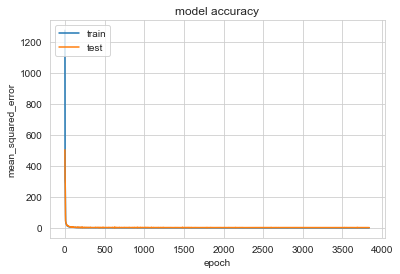

In [138]:
# optimum model test
from keras.callbacks import EarlyStopping

scaler = StandardScaler().fit(X_train)
reX = scaler.transform(X_train)


model = Sequential()
model.add(Dense(64, input_dim=reX.shape[1], kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(64, kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(64, kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(3, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)

history = model.fit(reX, y_train, validation_split=0.2, epochs=5000, callbacks=[es])
#history = model.fit(reX, y, validation_split=0.2, epochs=15000)

#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [139]:
Title = []
MAE4 = []
MSE4 = []
R24 = []

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#scaler = StandardScaler().fit(X_train)

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)


name = 'Neural_Network'
Title.append('%s' % name)
MAE4.append('%f' %  round(sm.mean_absolute_error(y_test, predictions),5))
MSE4.append('%f' %  round(sm.mean_squared_error(y_test, predictions),5))
R24.append('%f' %  round(sm.r2_score(y_test,predictions),5))

In [140]:
y_test = y_test.reset_index(drop='index')
#y_test = y_test.drop(['index'],axis=1)
y_test

,Target_L,Target_a,Target_b
0,66.93,-46.96,9.39
1,45.90,-12.42,-18.34
2,28.99,1.55,-13.41
3,45.21,1.89,20.79
4,46.32,17.98,18.88
...,...,...,...
742,70.33,33.20,64.93
743,33.13,0.05,5.48
744,27.79,3.43,1.47
745,46.27,-19.44,14.35


In [141]:
predictions = pd.DataFrame(predictions, columns = ['Pred_L','Pred_a','Pred_b'])
predictions

,Pred_L,Pred_a,Pred_b
0,67.618866,-49.164684,9.987902
1,45.727779,-12.486172,-17.647470
2,29.205816,1.555748,-12.110666
3,45.660004,3.720493,21.105192
4,45.494026,17.291286,18.621029
...,...,...,...
742,70.388779,34.573616,64.690559
743,33.465088,0.267878,5.566688
744,28.716904,3.126501,1.911572
745,44.718819,-19.697279,13.326672


In [142]:
F2_result = pd.DataFrame(Title)
F2_result.columns = ['Model']
F2_result['MAE'] = pd.DataFrame(MAE4)
F2_result['MSE'] = pd.DataFrame(MSE4)
F2_result['R2'] = pd.DataFrame(R24)
#F_result['Std'] = pd.DataFrame(round(sm.r2_score(y_test,predictions),5))

F2_result

,Model,MAE,MSE,R2
0,Neural_Network,0.809590,1.587650,0.996080


In [143]:
new_result = pd.concat((y_test, predictions),axis=1)
new_result['Delta_E'] = ((y_test['Target_L'] - predictions['Pred_L'])**2+(y_test['Target_a'] - predictions['Pred_a'])**2+(y_test['Target_b'] - predictions['Pred_b'])**2)**0.5 
new_result

,Target_L,Target_a,Target_b,Pred_L,Pred_a,Pred_b,Delta_E
0,66.93,-46.96,9.39,67.618866,-49.164684,9.987902,2.385929
1,45.90,-12.42,-18.34,45.727779,-12.486172,-17.647470,0.716684
2,28.99,1.55,-13.41,29.205816,1.555748,-12.110666,1.317148
3,45.21,1.89,20.79,45.660004,3.720493,21.105192,1.911165
4,46.32,17.98,18.88,45.494026,17.291286,18.621029,1.106176
...,...,...,...,...,...,...,...
742,70.33,33.20,64.93,70.388779,34.573616,64.690559,1.395567
743,33.13,0.05,5.48,33.465088,0.267878,5.566688,0.408986
744,27.79,3.43,1.47,28.716904,3.126501,1.911572,1.070629
745,46.27,-19.44,14.35,44.718819,-19.697279,13.326672,1.876048


In [144]:
test = new_result['Delta_E'].mean()
test

1.6132713042143576

In [145]:
new_result[new_result['Delta_E']<1.5].count()

Target_L    436
Target_a    436
Target_b    436
Pred_L      436
Pred_a      436
Pred_b      436
Delta_E     436
dtype: int64

In [146]:
new_result.shape

(747, 7)

In [147]:
model.save("model.h5")

In [148]:
model = load_model('model.h5')

In [149]:
df = pd.read_csv('BC.csv')

In [150]:
# x,y 인자 선정

#X = df.drop(['Final_Dl','Final_Da','Final_Db'], axis=1)
X = df.drop(['Base','Pro_name','Target_L','Target_a','Target_b'], axis=1)

y = df[['Target_L','Target_a','Target_b']]


X2 = pd.concat((X, y),axis=1)
X2.to_csv('train.csv',index = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=7)
#X_test3 = X_test2.copy()
#X_test3te


In [151]:
rescaledTrainX = scaler.transform(X)
predictions2 = model.predict(rescaledTrainX )

predictions2 = pd.DataFrame(predictions2, columns = ['Pred_L','Pred_a','Pred_b'])
predictions2

,Pred_L,Pred_a,Pred_b
0,40.566231,2.702384,4.526684
1,27.963247,-2.475059,-0.520817
2,40.950718,42.961620,23.707302
3,76.864204,27.485401,82.243935
4,40.809372,39.679890,21.834690
...,...,...,...
2487,49.262520,-14.675404,10.359146
2488,42.226700,-20.986860,19.163933
2489,42.226700,-20.986860,19.163933
2490,49.262520,-14.675404,10.359146


In [152]:
y_train = y.reset_index(drop='index')
#y_test = y_test.drop(['index'],axis=1)
y_train

,Target_L,Target_a,Target_b
0,32.27,3.48,4.10
1,27.83,-2.05,-0.67
2,40.99,43.75,23.62
3,76.58,26.42,81.07
4,40.62,40.74,21.24
...,...,...,...
2487,49.02,-4.59,-13.89
2488,40.77,-21.89,18.30
2489,40.77,-21.85,18.24
2490,39.05,-18.47,-8.90


In [153]:
new_result2 = pd.concat((y_train, predictions2),axis=1)
new_result2['Delta_E'] = ((y_train['Target_L'] - predictions2['Pred_L'])**2+(y_train['Target_a'] - predictions2['Pred_a'])**2+(y_train['Target_b'] - predictions2['Pred_b'])**2)**0.5 
new_result2

,Target_L,Target_a,Target_b,Pred_L,Pred_a,Pred_b,Delta_E
0,32.27,3.48,4.10,40.566231,2.702384,4.526684,8.343512
1,27.83,-2.05,-0.67,27.963247,-2.475059,-0.520817,0.469772
2,40.99,43.75,23.62,40.950718,42.961620,23.707302,0.794171
3,76.58,26.42,81.07,76.864204,27.485401,82.243935,1.610582
4,40.62,40.74,21.24,40.809372,39.679890,21.834690,1.230184
...,...,...,...,...,...,...,...
2487,49.02,-4.59,-13.89,49.262520,-14.675404,10.359146,26.263954
2488,40.77,-21.89,18.30,42.226700,-20.986860,19.163933,1.919379
2489,40.77,-21.85,18.24,42.226700,-20.986860,19.163933,1.928895
2490,39.05,-18.47,-8.90,49.262520,-14.675404,10.359146,22.127115


In [154]:
test2 = new_result2['Delta_E'].mean()
test2

1.168541343983946

In [155]:
new_result2[new_result2['Delta_E']<1.5].count()

Target_L    1978
Target_a    1978
Target_b    1978
Pred_L      1978
Pred_a      1978
Pred_b      1978
Delta_E     1978
dtype: int64

In [156]:
new_result2.shape

(2492, 7)